In [4]:
import numpy as np

In [5]:
data = np.loadtxt("ex1data1.txt", delimiter=',')
X = data[:,0]
Y = data[:,1]
m = len(X)
X = X.reshape(m, 1)
Y = Y.reshape(m, 1)

In [2]:
import matplotlib.pyplot as plt

Text(0, 0.5, "'Profit in $10,000s")

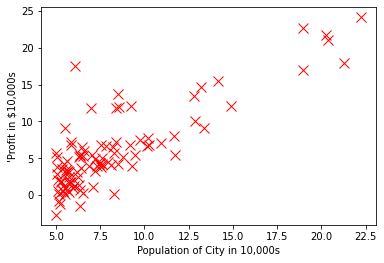

In [6]:
plt.plot(X, Y, "rx", markersize = 10)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("'Profit in $10,000s")

In [7]:
X = np.concatenate((np.ones((m, 1)), data[:,0].reshape(m, 1)), axis = 1)
theta = np.zeros((2, 1))
iterations = 1500
alpha = 0.01

In [8]:
def computeCost(X, y, theta):
    m = len(y)
    predictH = np.dot(X, theta)
    square = np.power(predictH - y, 2)
    S = sum(square)
    res = S / 2 / m
    return res

In [9]:
cost = computeCost(X, Y, theta)
print(cost)

[32.07273388]


In [10]:
def gradientDescent(X, y, theta, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters, 1))
    
    for i in range(num_iters):
        temp_theta = theta
        predictH = np.dot(X, theta)
        S = np.dot(X.T, predictH - y)
        temp_theta = theta - S * alpha / m
        theta = temp_theta
        J_history[i,0] = computeCost(X, y, theta)
    
    return theta, J_history

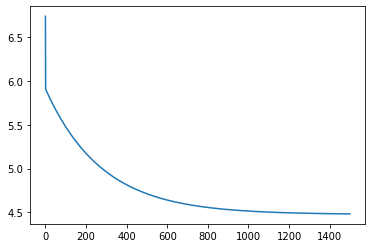

In [11]:
final_theta, history = gradientDescent(X, Y, theta, iterations)
plt.plot(history)

In [12]:
predict1 = np.dot(np.array([1, 3.5]), final_theta)
predict2 = np.dot(np.array([1, 7]), final_theta)
print(predict1, predict2)

[0.45197679] [4.53424501]


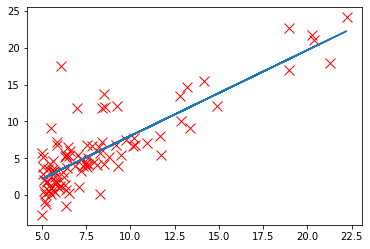

In [13]:
h = np.dot(X, final_theta)
plt.plot(data[:,0], Y, 'rx', data[:, 0], h, markersize = 10)

In [14]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        theta_val = np.array([theta0_vals[i], theta1_vals[j]]).reshape(2, 1)
        J_vals[i, j] = computeCost(X, Y, theta_val)

In [15]:
from mpl_toolkits.mplot3d import Axes3D

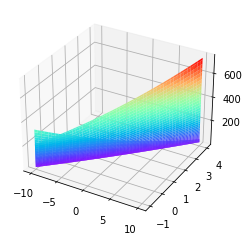

In [18]:
fig = plt.figure()
ax3 = plt.axes(projection = '3d')
ax3.plot_surface(theta0_vals, theta1_vals, J_vals.T,cmap='rainbow')

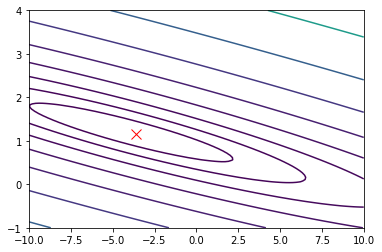

In [17]:
plt.contour(theta0_vals, theta1_vals, J_vals.T, np.logspace(-2, 3, 20))
plt.plot(final_theta[0,0], final_theta[1,0], 'rx', markersize = 10, linewidth = 2)